# Lasso and Ridge Regression

Our goal is to build and compare a Lasso and Ridge model to predict concrete compressive strength (css) based on all the variables.

## Lasso

In [1]:
import pandas as pd

### Step 1: Load and prep data

In [2]:
concrete = pd.read_csv("Concrete_Data.csv")
concrete.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
#Rename columns
concrete.columns = ['cement', 'blast', 'flyash', 'water', 'sp', 'ca', 'fa', 'age', 'ccs']
concrete.head()

,cement,blast,flyash,water,sp,ca,fa,age,ccs
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
concrete.isnull().sum() #Check for null values

cement    0
blast     0
flyash    0
water     0
sp        0
ca        0
fa        0
age       0
ccs       0
dtype: int64

### Step 2: Split the data into train, valid, and test

In [5]:
from sklearn.model_selection import train_test_split

X = concrete.copy()
del X['ccs']
y = concrete['ccs']

#Split the data into train, valid, and test set (60%-20%-20%)
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

#Next we split out 25% of the previous 80% which equals 20% of the original data 
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size = 0.25, random_state = 1)

### Step 3: Select the best alpha value w/ MSE

In [6]:
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model
from sklearn import metrics
import numpy as np

#First, we standardize our train and valid datasets based on the training set
scaler = StandardScaler()
scaler.fit(X_train) #Fit the data with training set
X_train= pd.DataFrame(scaler.transform(X_train)) #Next, transform
X_valid= pd.DataFrame(scaler.transform(X_valid)) #Next, transform

In [7]:
#Second, create a loop to find the best alpha value by evaluating the MSE
alphas = np.logspace(-10,10,21) #Create a numble grid to test
alphas_index = np.linspace(-10,10,21) #The alpha values for the graph index

Validation_Scores=[] #Create a list to hold MSE 

for a in alphas:
    lm = linear_model.Lasso(alpha = a) 
    lm.fit(X_train,y_train) #Fit model
    Validation_Scores.append(metrics.mean_squared_error(lm.predict(X_valid), y_valid)) #Calculate MSE

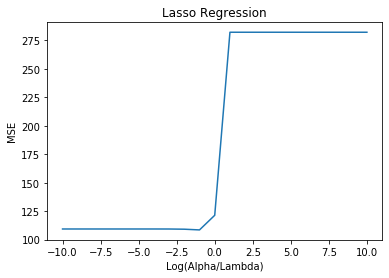

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

#Graph MSE of validation set
plt.plot(alphas_index, Validation_Scores)
plt.xlabel("Log(Alpha/Lambda)")
plt.ylabel("MSE")
plt.title("Lasso Regression")
plt.show()

In [9]:
bestalpha = alphas[np.argmin(Validation_Scores)] #Find the lowest MSE (best alpha value) 
print(bestalpha) #alpha value 
print(min(Validation_Scores)) #MSE 

0.1
108.51867779740218


The best alpha value is 0.1 with a MSE of 108.52

### Step 4: Train model with best alpha and report MSE of the test set

In [10]:
# Restandardize the data
scaler.fit(X_train_valid) #Fit data with combined dataset
X_train_valid = pd.DataFrame(scaler.transform(X_train_valid)) #Transform 
X_test = pd.DataFrame(scaler.transform(X_test)) #Transform

In [11]:
#Run KNN model with best alpha value 
lm2= linear_model.Lasso(alpha = bestalpha) #Use best alpha
lm2.fit(X_train_valid,y_train_valid) #Fit model
print(metrics.mean_squared_error(lm2.predict(X_test), y_test)) #Calculate MSE 


123.90365131181836


Our LASSO model has a MSE of 123.90

### Step 5: Observe Model

In [12]:
pd.DataFrame(zip(X.columns.values, lm2.coef_))

,0,1
0,cement,11.154474
1,blast,7.393496
2,flyash,4.257816
3,water,-4.084364
4,sp,2.017821
5,ca,0.000000
6,fa,-0.000000
7,age,7.079904


The Lasso model removed two variables by shrinking the coefficients to 0: ca and fa. This means the variables were insignificant.

## Ridge

### Step 1: Select the best alpha value w/ MSE

In [13]:
#First, we standardize our train and valid datasets based on the training set
scaler = StandardScaler()
scaler.fit(X_train) #Fit the data with training set
X_train= pd.DataFrame(scaler.transform(X_train)) #Next, transform
X_valid= pd.DataFrame(scaler.transform(X_valid)) #Next, transform

In [14]:
Validation_Scores = [] #create empty list 
#create loop to test lamba grid
for a in alphas:
    lm3 = linear_model.Ridge(alpha=a) #We can use the same alpha grid from LASSO
    lm3.fit(X_train, y_train) # Fit model 
    y_hat = lm3.predict(X_valid)
    Validation_Scores.append(metrics.mean_squared_error(y_hat, y_valid)) # Evaluate model on validation set

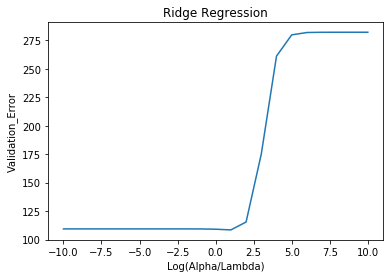

In [15]:
#Graph validation scores from each model
plt.plot(alphas_index, Validation_Scores)
plt.xlabel("Log(Alpha/Lambda)")
plt.ylabel("Validation_Error")
plt.title("Ridge Regression")
plt.show()

In [16]:
bestalpha = alphas[np.argmin(Validation_Scores)] #Find the lowest MSE (best alpha value) 
print(bestalpha) #Alpha value 
print(min(Validation_Scores)) #MSE 

10.0
108.44624825507825


The best alpha value is 10 with a MSE of 108.45.

### Step 2: Train model with best alpha and report MSE of the test set

In [17]:
# Restandardize the data
scaler.fit(X_train_valid) #Fit data with combined dataset
X_train_valid = pd.DataFrame(scaler.transform(X_train_valid)) #Transform 
X_test = pd.DataFrame(scaler.transform(X_test)) #Transform

In [18]:
#Run Ridge model with best alpha value 
lm4= linear_model.Ridge(alpha = bestalpha) #Use best alpha
lm4.fit(X_train_valid,y_train_valid) #Fit model
print(metrics.mean_squared_error(lm4.predict(X_test), y_test)) #Calculate MSE 

123.98017020152753


Our Ridge model has a MSE of 123.98

### Step 3: Observe and Compare Model

In [19]:
pd.DataFrame(zip(X.columns.values, lm4.coef_))

,0,1
0,cement,11.281461
1,blast,7.569375
2,flyash,4.387266
3,water,-3.910978
4,sp,2.173202
5,ca,0.241345
6,fa,0.152566
7,age,7.114168


The two variables that were removed from the LASSO model are very small here: ca=0.2, fa=0.1. The Lasso model has a slightly smaller MSE, meaning it is the better model.